### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

## Step 1: Check the Data Types of all the columns in the dataframe

In [22]:
heroes_and_powers_df.dtypes

Agility                   object
Accelerated Healing       object
Lantern Power Ring        object
Dimensional Awareness     object
Cold Resistance           object
Durability                object
Stealth                   object
Energy Absorption         object
Flight                    object
Danger Sense              object
Underwater breathing      object
Marksmanship              object
Weapons Master            object
Power Augmentation        object
Animal Attributes         object
Longevity                 object
Intelligence              object
Super Strength            object
Cryokinesis               object
Telepathy                 object
Energy Armor              object
Energy Blasts             object
Duplication               object
Size Changing             object
Density Control           object
Stamina                   object
Astral Travel             object
Audio Control             object
Dexterity                 object
Omnitrix                  object
          

Will need to convert to True/False to 1 and 0 so that I can take sums of the columns

## Step 2: Convert True/False to 1/0

In [29]:
heroes_and_powers_df.replace('True', 1, inplace = True)
heroes_and_powers_df.replace('False', 0, inplace = True)

In [31]:
heroes_and_powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,0,1,0,0,0,1,0,0,0,0,...,0,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,1,1,0,0,1,1,0,0,0,0,...,0,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,0,0,1,0,0,0,0,0,0,0,...,0,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,0,1,0,0,0,0,0,0,0,0,...,0,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,0,0,0,1,0,0,0,0,1,0,...,0,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Step 3 For Each Column Count How Many Trues (or 1s) in each Column

In [35]:
heroes_and_powers_df.sum()

Agility                                                                244
Accelerated Healing                                                    181
Lantern Power Ring                                                      11
Dimensional Awareness                                                   25
Cold Resistance                                                         49
Durability                                                             262
Stealth                                                                132
Energy Absorption                                                       77
Flight                                                                 212
Danger Sense                                                            34
Underwater breathing                                                    23
Marksmanship                                                           124
Weapons Master                                                         107
Power Augmentation       

Taking the sum of all the columns is giving me some weird results.  This is because it is taking the sum of all columns regardless of datatype.  I do not want them take the sums of columns that are not integers. 

In [39]:
heroes_and_powers_df.loc[:, heroes_and_powers_df.dtypes == np.int64].sum()

Agility                  244
Accelerated Healing      181
Lantern Power Ring        11
Dimensional Awareness     25
Cold Resistance           49
Durability               262
Stealth                  132
Energy Absorption         77
Flight                   212
Danger Sense              34
Underwater breathing      23
Marksmanship             124
Weapons Master           107
Power Augmentation         8
Animal Attributes         26
Longevity                116
Intelligence             158
Super Strength           362
Cryokinesis               20
Telepathy                 92
Energy Armor               8
Energy Blasts            148
Duplication               17
Size Changing             55
Density Control           15
Stamina                  294
Astral Travel              4
Audio Control              8
Dexterity                  6
Omnitrix                   1
                        ... 
Intuitive aptitude         1
Vision - Microscopic      19
Melting                    2
Wind Control  

All right I have counts for each column that is an integer.  I now want to put it in a pandas dataframe, so that I can more easily sort and plot the data.

## Step 4: Make New DataFrame with each column and the count

In [40]:
df = pd.DataFrame(heroes_and_powers_df.loc[:, heroes_and_powers_df.dtypes == np.int64].sum())

In [41]:
df.head()

,0
Agility,244
Accelerated Healing,181
Lantern Power Ring,11
Dimensional Awareness,25
Cold Resistance,49


Looks pretty good.  I do want to change the column header to something that is a little more relevant.  

## Step 5: Update the column name

In [42]:
df.columns = ['Count']

In [44]:
df.head()

,Count
Agility,244
Accelerated Healing,181
Lantern Power Ring,11
Dimensional Awareness,25
Cold Resistance,49


Looks good.  Now I want to sort and show the top 5 highest counts.

## Step 6: Find Top 5 Most Common Powers

In [47]:
df['Count'].sort_values(ascending = False).head()

Super Strength    362
Stamina           294
Durability        262
Super Speed       251
Agility           244
Name: Count, dtype: int64

## Step 7: Plot the Top 5 Most Common Powers

In [50]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

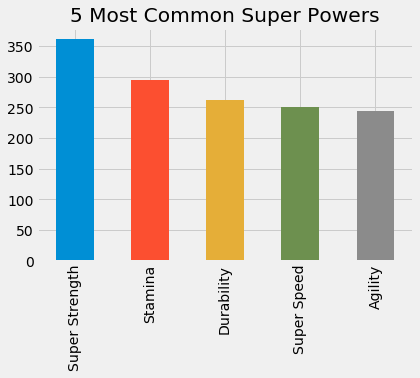

In [53]:
df['Count'].sort_values(ascending = False).head().plot(kind = 'bar')
plt.title('5 Most Common Super Powers')
plt.show()